In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting


pd.set_option('display.float_format', '{:,.0f}'.format)

In [5]:
ticker = "BP.l"
period = "10y"
stock = yf.Ticker(ticker.upper())
history = stock.history(period=period)

/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [6]:
history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,"2,520","2,520","2,520","2,520","2,520","2,520","2,520"
mean,332,336,328,332,"42,519,661",0,0
std,85,85,85,85,"23,142,909",1,0
min,161,164,4,163,0,0,0
25%,261,265,258,262,"28,249,284",0,0
50%,315,319,313,316,"36,584,216",0,0
75%,404,408,400,404,"50,464,012",0,0
max,544,547,538,543,"257,457,024",8,0


In [7]:
stock.cash_flow

,2022-12-31,2021-12-31,2020-12-31
Free Cash Flow,"28,863,000,000","12,725,000,000","-144,000,000"
Repurchase Of Capital Stock,"-9,996,000,000","-3,151,000,000","-776,000,000"
Repayment Of Debt,"-11,697,000,000","-16,804,000,000","-12,179,000,000"
Issuance Of Debt,"2,013,000,000","6,987,000,000","14,736,000,000"
Capital Expenditure,"-12,069,000,000","-10,887,000,000","-12,306,000,000"
End Cash Position,"29,195,000,000","30,681,000,000","31,111,000,000"
Beginning Cash Position,"30,681,000,000","31,111,000,000","22,472,000,000"
Effect Of Exchange Rate Changes,"-684,000,000","-269,000,000","379,000,000"
Changes In Cash,"-802,000,000","-161,000,000","8,260,000,000"
Financing Cash Flow,"-28,021,000,000","-18,079,000,000","3,956,000,000"


In [18]:
stock.balance_sheet.

,2022-12-31,2021-12-31,2020-12-31
Treasury Shares Number,"940,571,000","1,037,201,000","1,105,157,000"
Preferred Shares Number,"12,706,000","12,706,000","12,706,000"
Ordinary Shares Number,"18,157,212,000","19,740,880,000","20,344,625,000"
Share Issued,"19,097,783,000","20,778,081,000","21,449,782,000"
Net Debt,"23,615,000,000","35,235,000,000","43,470,000,000"
...,...,...,...
Taxes Receivable,"1,658,000,000","1,673,000,000","1,229,000,000"
Accounts Receivable,"28,229,000,000","22,307,000,000","12,926,000,000"
Cash Cash Equivalents And Short Term Investments,"23,907,000,000","26,221,000,000","29,527,000,000"
Other Short Term Investments,"578,000,000","280,000,000","333,000,000"


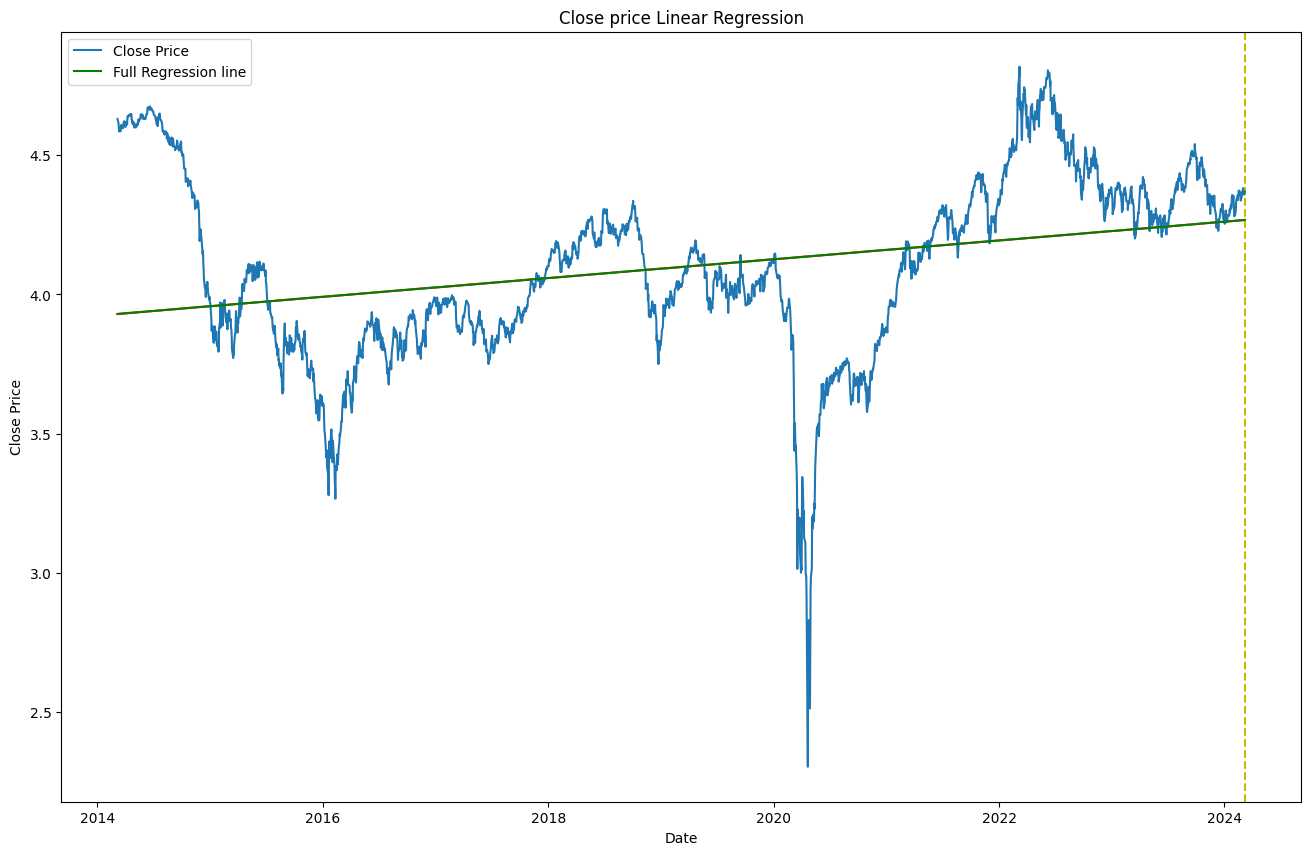

In [4]:
plotting.plot_regression_line(history, reg_line_count=1, log_scale=True)

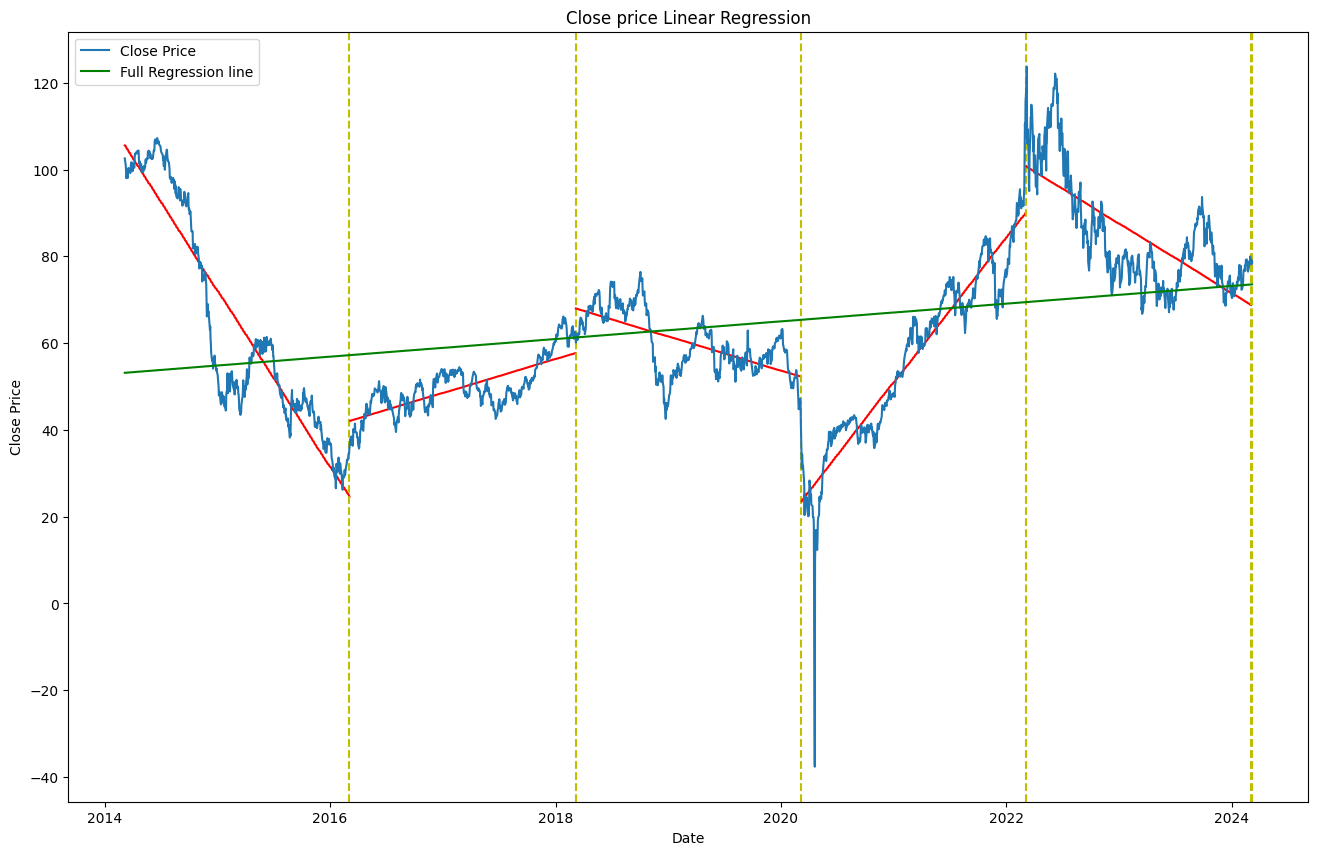

In [25]:
plotting.plot_regression_line(history, reg_line_count=5, log_scale=False)

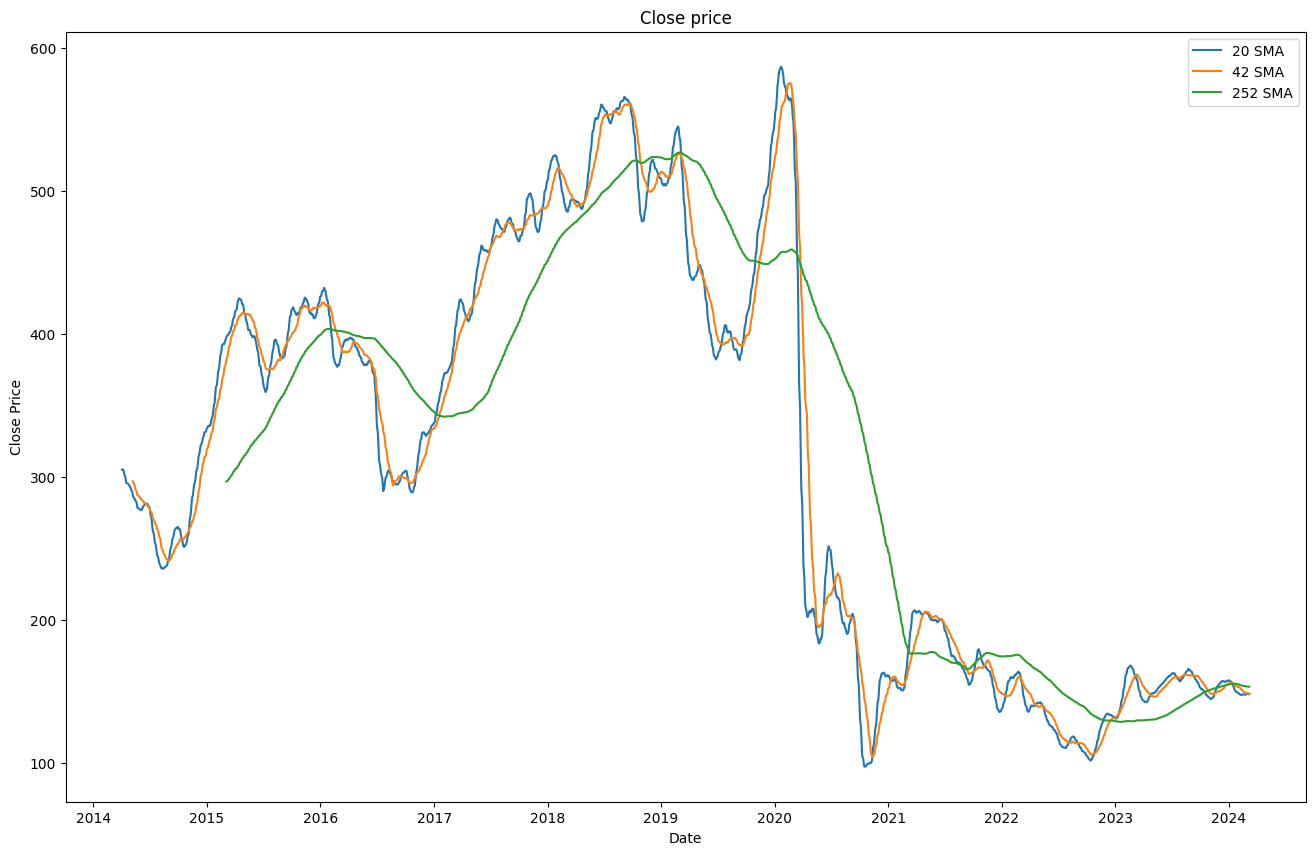

In [13]:
plotting.plot_sma(history, [20, 42, 252], hide_data=True)